# Run the whole deltas algorithm

In [202]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pipeline
# import deltas
import model_deltas
import models

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Get data

In [203]:
N1 = 10000
N2 = 10
data_clf = pipeline.get_data(
    m1=[-5, -5],
    m2=[10, 10],
    cov1=[[10, 0], [0, 10]],
    cov2=[[50, 0], [0, 50]],
    N1=N1,
    N2=N2,
    scale=True)


## Get Classifier

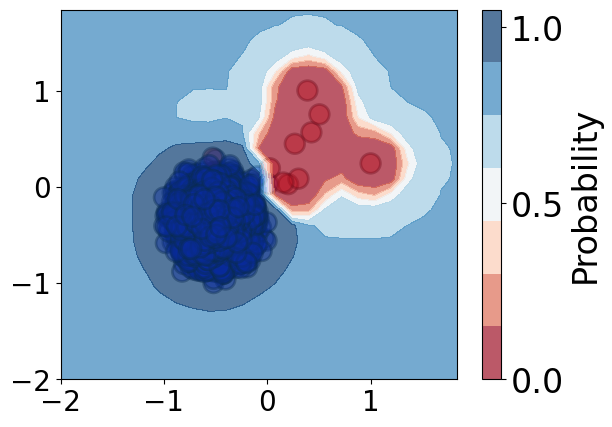

In [204]:
model = 'SVM-linear'
model = 'SVM-rbf'
# model = 'Linear'
# model = 'MLP'

balance_clf = True
balance_clf = False

data_clf['clf'] = pipeline.get_classifier(
                      data_clf=data_clf,
                      model=model,
                      balance_clf=balance_clf)

In [205]:
clf = data_clf['clf']
clf.get_projection([[1, 1]]) #- clf.intercepts_[-1]

[[1, 1]]

## Fit deltas

deltas init: [1, 0.062359688735542824]
eq. 7 can be satisfied: False
constraint init: False
Grid Search Optimisation Complete
    delta1 : 1e-15 
    delta2: 0.03243445673971269
    constraint satisfied: False


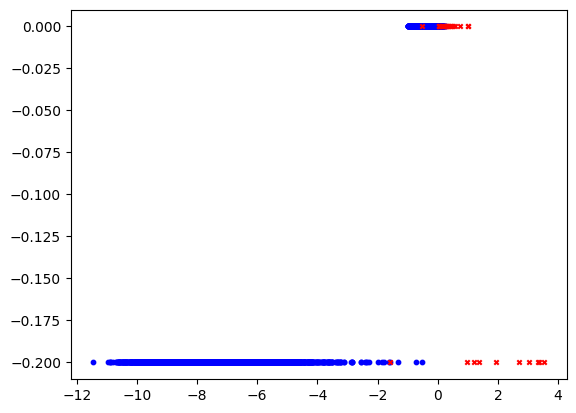

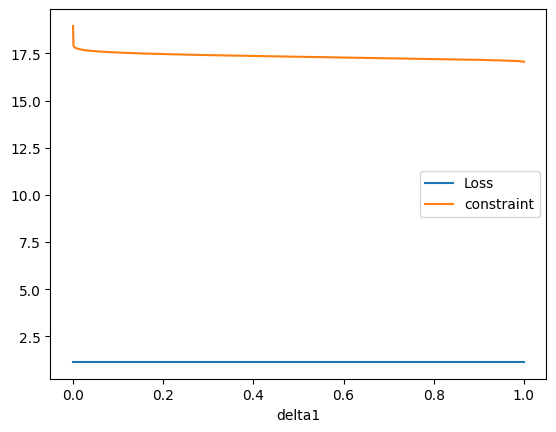

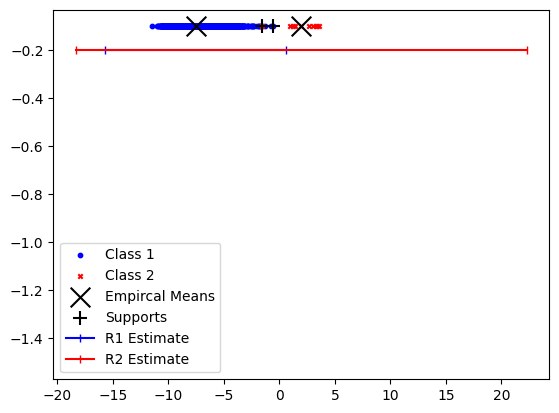

In [206]:
X = data_clf['data']['X']
y = data_clf['data']['y']
deltas_model = model_deltas.reprojection_deltas(
    clf,
    projection_model=model_deltas.reprojectioner(projecter=models.NN())
    ).fit(X, y, _print=True, _plot=True)

## Plot training data information

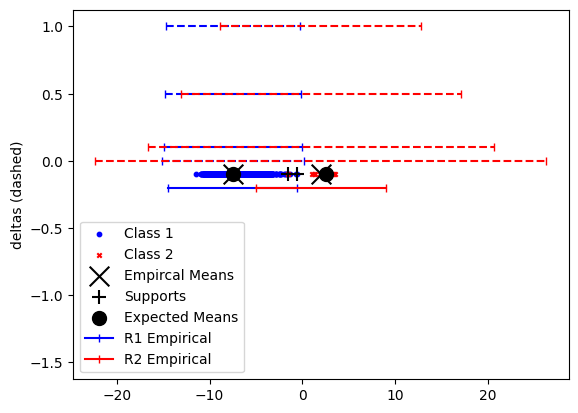

In [207]:
deltas_model.plot_data(data_clf['mean1'], data_clf['mean2'])

## Show parameters

In [208]:
deltas_model.print_params()

Parameters
                R:  11.448925133146496
                N1: 10000
                N2: 10
                R1: 6.967504224282544
                R2: 3.5808534698681536
                M:  1.0590908952422948
                D:  9.489266798908401
                C1: 1
                C2: 1


# Evaluation on test data

original accuracy: 0.7603
deltas   accuracy: 0.55485
original F1: 0.6847297119558069
deltas   F1: 0.6919696917275023
original precision: 1.0
deltas   precision: 0.5290165582182722


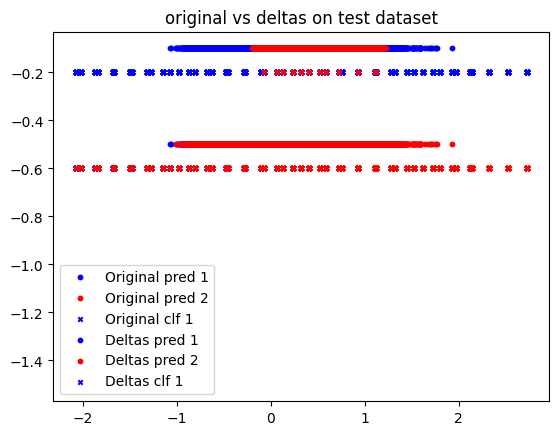

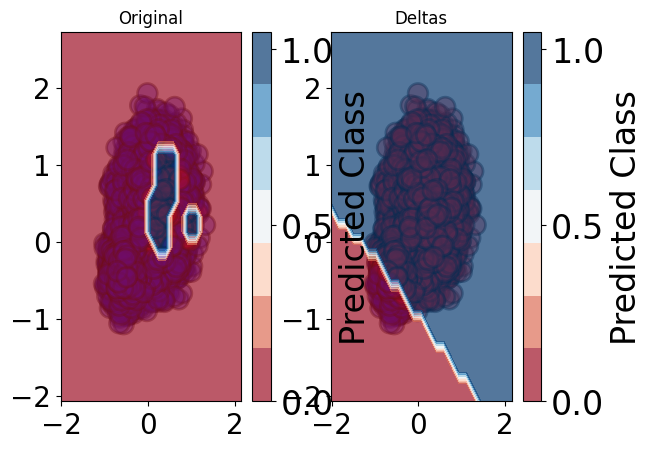

In [209]:
pipeline.eval_test_new(clf, deltas_model,
                       data_clf['data_test'], _print=True, _plot=True)